In [1]:
import numpy as np 
import gvar as gv
import h5py as h5

from lametlat.utils.plot_settings import *
from lametlat.utils.resampling import *
from lametlat.preprocess.read_raw import pt2_to_meff

In [2]:
data_path = "output/c4864_proton_PDF.h5"

# read data
f = h5.File(data_path, 'r')

# read 2pt data
pt2_real = (f['2pt']['px0_py0_pz0_pt0']['gamma_I']['real'][:] + f['2pt']['px0_py0_pz0_pt0']['gamma_T']['real'][:])/4
pt2_imag = (f['2pt']['px0_py0_pz0_pt0']['gamma_I']['imag'][:] + f['2pt']['px0_py0_pz0_pt0']['gamma_T']['imag'][:])/4

pt2_real_jk = jackknife(pt2_real)
pt2_imag_jk = jackknife(pt2_imag)

pt2_real_jk_avg = jk_ls_avg(pt2_real_jk)
pt2_imag_jk_avg = jk_ls_avg(pt2_imag_jk)

print(np.shape(pt2_real_jk_avg))


(64,)


[-0.4744(12) -0.006143(37) -0.0001705(22) -6.91(18)e-06 -3.96(14)e-07
 -3.17(11)e-08 -3.16(12)e-09 -3.52(16)e-10 -4.22(20)e-11 -5.36(29)e-12
 -6.99(41)e-13 -9.25(57)e-14 -1.234(78)e-14 -1.68(11)e-15 -2.33(17)e-16
 -3.26(25)e-17 -4.56(37)e-18 -6.27(53)e-19 -8.70(76)e-20 -1.21(11)e-20
 -1.70(15)e-21 -2.38(22)e-22 -3.36(31)e-23 -4.69(45)e-24 -6.51(64)e-25
 -9.11(92)e-26 -1.27(13)e-26 -1.78(19)e-27 -2.47(27)e-28 -3.41(38)e-29
 -4.65(53)e-30 -6.17(73)e-31 -8.3(1.0)e-32 -3.55(55)e-32 -1.38(22)e-31
 -6.5(1.0)e-31 -2.76(52)e-30 -1.36(29)e-29 -7.2(1.9)e-29 -5.3(1.6)e-28
 -4.0(1.2)e-27 -2.75(77)e-26 -1.90(56)e-25 -1.28(45)e-24 -9.4(3.0)e-24
 -7.4(2.2)e-23 -5.2(1.4)e-22 -3.81(95)e-21 -3.20(70)e-20 -2.86(50)e-19
 -2.17(36)e-18 -2.06(27)e-17 -1.73(23)e-16 -1.49(16)e-15 -1.26(15)e-14
 -1.13(12)e-13 -1.10(10)e-12 -1.192(91)e-11 -1.251(74)e-10 -1.547(77)e-09
 -2.377(90)e-08 -4.51(17)e-07 -1.265(31)e-05 -0.000493(10)]


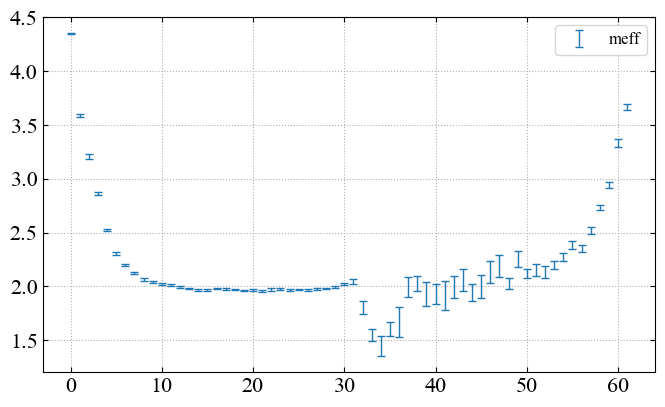

In [15]:
meff = pt2_to_meff(pt2_real_jk_avg, boundary="periodic")

print(pt2_real_jk_avg)

fig, ax = default_plot()
ax.errorbar(np.arange(len(meff)), gv.mean(meff), gv.sdev(meff), label='meff', **errorb)
ax.legend(loc="upper right", ncol=2, **fs_small_p)
plt.tight_layout()
plt.show()

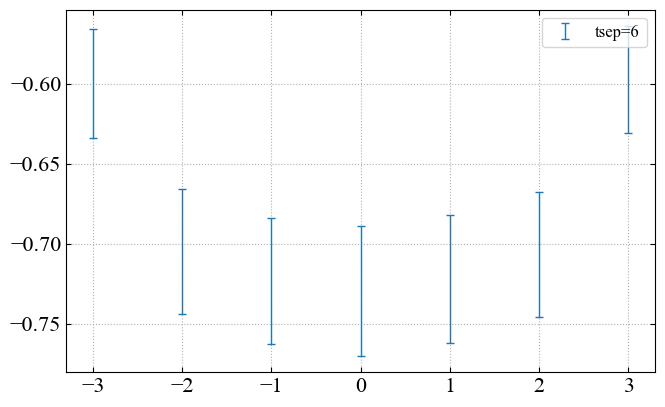

In [12]:
z = 0
tau_cut = 0

fig, ax = default_plot()

for tsep in [6]:
    # read 3pt data
    pt3_real = f['3pt']['px0_py0_pz0_pt0'][f'tsep_{tsep}'][f'z_{z}']['down']['PpSzp']['gamma_T']['real']
    pt3_imag = f['3pt']['px0_py0_pz0_pt0'][f'tsep_{tsep}'][f'z_{z}']['down']['PpSzp']['gamma_T']['imag']

    pt3_real_jk = jackknife(pt3_real)
    pt3_imag_jk = jackknife(pt3_imag)

    pt3_real_jk_avg = jk_ls_avg(pt3_real_jk)
    pt3_imag_jk_avg = jk_ls_avg(pt3_imag_jk)

    ratio_re = pt3_real_jk_avg[tau_cut:tsep+1-tau_cut] / pt2_real_jk_avg[tsep]
    ratio_im = pt3_imag_jk_avg[tau_cut:tsep+1-tau_cut] / pt2_real_jk_avg[tsep]

    tau_ls = np.arange(tau_cut, tsep+1-tau_cut) - tsep/2

    ax.errorbar(tau_ls, gv.mean(ratio_re), gv.sdev(ratio_re), label=f'tsep={tsep}', **errorb)

ax.legend(loc="upper right", ncol=2, **fs_small_p)
plt.tight_layout()
plt.show()
